In [1]:
import gymnasium as gym
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
import tensorflow_probability as tfp
import tensorboard
from keras.callbacks import TensorBoard
#from IPython.display import clear_output
#import matplotlib.pyplot as plt
import os
import datetime
import pygame
import mujoco


physical_devices = tf.config.list_physical_devices('GPU') 
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)
    

c:\Users\robin\anaconda3\Lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
c:\Users\robin\anaconda3\Lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.15.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure yo

## TODO erklären was für continuous geändert werden musste

## Add a Connection to Tensorboard -> online visualization

In [2]:
# refers to log data and model data -> below for model data
jetzt = datetime.datetime.now()
datum_uhrzeit = jetzt.strftime("%Y%m%d_%H%M%S")
savedir = f'model\\contMC_test{datum_uhrzeit}'
os.makedirs('model', exist_ok=True)
os.makedirs(savedir, exist_ok=True)

In [3]:
log_dir1 = f"{savedir}\\log"
os.makedirs(log_dir1, exist_ok=True)

if os.path.exists(log_dir1):
    print(f"The directory {log_dir1} exists.")
    absolute_path = os.path.abspath(log_dir1)
    print(absolute_path)
else:
    print(f"The directory {log_dir1} does not exist.")

The directory model\contMC_test20240111_164045\log exists.
c:\#_FESTPLATTE\06_Studium\Master_HKA\Semesterdateien\Semester 1\Roboterprogrammierung-Hein\Projekt\Coding\einheitlich\model\contMC_test20240111_164045\log


## Parameter/ Hyperparameter

MountainCar Continuous: max 1000 steps per Episode
Hopper: max 1000 steps per Episode

--> in stable baselines ist andere Trainingsstrategie angewendet. Es werden steps gesampelt anstatt rollouts (die Datenmenge zum Training ist immer gleich, egal wie lange die Episoden sind --> gerade zu Beginn daher wenig dten zum trainiern)

In [4]:
# Parameter for the actor and critic networks
actor_learning_rate = 0.000025   # learning rate for the actor
critic_learning_rate = 0.0001    # learning rate for the critic (shold be > than actor)
# If your actor changes faster than your critic, your estimated Q-value will not truly represent the value of your action, because that value is based on the past policies

# Parameter for the agent
gamma = 0.99                    # discount factor
epsilon = 0.1                   # clip range for the actor loss function

# Parameter for training
epochs =  10                 # number of learning iterations
n_rollouts = 5                  # number of episodes/ rollouts to collect experience
n_steps = 1024                 # number of steps per epoch -> issue wth hopper while using rollouts
batch_size = 16                  # number of samples per learning step
learn_steps = 8                # number of learning steps per epoch

## Environment initialisieren

In [5]:
from CustomMtnCarEnvironments import CustomMountainCarEnv_acceleration

#env = gym.make('MountainCarContinuous-v0', render_mode='rgb_array')  #human fur pygame gui -> very laggy!
#env = CustomMountainCarEnv_acceleration(env)

env = gym.make('Hopper-v4', render_mode='rgb_array')  #human fur pygame gui -> slows down training!

print(env.observation_space.low)
print(env.observation_space.high)

[-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf]
[inf inf inf inf inf inf inf inf inf inf inf]


## PPO-Agent initialisieren

In [6]:
from PPOAgentContinuous import PPOAgentContinuous as PPOAgent
agent = PPOAgent(env.action_space, env.observation_space, gamma, epsilon, actor_learning_rate, critic_learning_rate)   # observation_space entpacken für obserbation_shape (siehe __init__)


action_shape bzw. Actor Outputs 3


## PPO-Agent trainieren

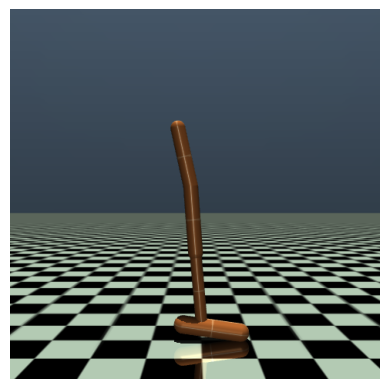

reward =  11.554733806337735


In [7]:
from train_agent import training_rollouts
from train_agent import training_steps
#training_rollouts(env, agent, log_dir1, epochs, n_rollouts, batch_size, learn_steps, render=False)
training_steps(env, agent, log_dir1, epochs, n_steps, batch_size, learn_steps, render=True)

In [8]:
# save the model to h5 format
filepath_actor = f"{savedir}\\actor.h5"
filepath_critic = f"{savedir}\\critic.h5"
agent.save_models(filepath_actor, filepath_critic)

## Storing and loading models

In [9]:
# load the model from h5 format -> use new agent in new instance of the enviroment to prevent overwriting
#load_env = gym.make("MountainCarContinuous-v0", render_mode='rgb_array')
load_env = gym.make("Hopper-v3", render_mode='rgb_array')

load_agent = PPOAgent(env.action_space, env.observation_space)
load_agent._init_networks()

# filepath_actor = f"... .h5"
# filepath_critic = f"... .h5"

load_agent.load_models(filepath_actor, filepath_critic)

c:\Users\robin\anaconda3\Lib\site-packages\gymnasium\envs\registration.py:513: DeprecationWarning: WARN: The environment Hopper-v3 is out of date. You should consider upgrading to version `v4`.
  logger.deprecation(


DependencyNotInstalled: No module named 'mujoco_py'. (HINT: you need to install mujoco-py, and also perform the setup instructions here: https://github.com/openai/mujoco-py.)

## Rendering with pygame

In [ ]:
from render_GUI import render_GUI

# Set up the enviroment and load the trained agent from directory
render_env = gym.make('Hopper-v4', render_mode = 'human')
render_agent = PPOAgent(render_env.action_space, render_env.observation_space)

#filepath_actor = f"./model/test_20240109_202119/actor.h5"
#filepath_critic = f"./model/test_20240109_202119/critic.h5"

#call the function
render_GUI(render_env, agent)


action_shape bzw. Actor Outputs 3


AttributeError: 'mujoco._structs.MjData' object has no attribute 'solver_iter'